# Explore here

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"

df = pd.read_csv(url, sep =',')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [222]:
df.shape

(3140, 108)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [224]:
df.select_dtypes(object)

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


In [225]:
df['COUNTY_NAME'] = pd.factorize(df['COUNTY_NAME'])[0]
df['STATE_NAME'] = pd.factorize(df['STATE_NAME'])[0]

In [226]:
df.duplicated().sum()

np.int64(0)

In [227]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart disease_number', axis = 1)
y = df['Heart disease_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1113,22005,124672,18100,14.518095,18206,14.603119,15468,12.406956,18382,14.744289,...,6812,11.2,10.4,11.9,10228,2.7,2.6,2.9,2486,3
1551,29141,20358,2548,12.515964,2510,12.329305,2006,9.853620,2013,9.888005,...,2118,15.5,14.1,16.8,2431,4.2,3.8,4.5,652,6
2423,46129,5587,727,13.012350,726,12.994451,569,10.184357,596,10.667621,...,287,11.5,10.5,12.5,490,3.4,3.1,3.7,145,6
2578,48115,12619,1782,14.121563,1801,14.272129,2006,15.896664,1770,14.026468,...,825,16.2,15.3,17.0,1522,3.9,3.7,4.2,369,5
1675,31047,23709,3586,15.125058,3441,14.513476,2947,12.429879,2902,12.240078,...,1264,12.5,11.6,13.3,2154,3.2,3.0,3.5,559,5


In [228]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)

X_test_norm = scaler.fit_transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

X_train_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1113,0.381563,0.012328,0.014980,0.581119,0.014692,0.626626,0.009934,0.358052,0.012232,0.536283,...,0.015677,0.265625,0.263441,0.262626,0.010728,0.186047,0.200,0.195652,0.010443,0.4
1551,0.511210,0.002006,0.002109,0.500980,0.002026,0.529055,0.001288,0.284366,0.001333,0.235255,...,0.004863,0.489583,0.462366,0.510101,0.002541,0.534884,0.500,0.543478,0.002730,1.0
2423,0.819847,0.000544,0.000602,0.520849,0.000586,0.557597,0.000365,0.293910,0.000390,0.283581,...,0.000645,0.281250,0.268817,0.292929,0.000503,0.348837,0.325,0.369565,0.000597,1.0
2578,0.855928,0.001240,0.001475,0.565247,0.001453,0.612423,0.001288,0.458762,0.001171,0.491787,...,0.001884,0.526042,0.526882,0.520202,0.001587,0.465116,0.475,0.478261,0.001539,0.8
1675,0.545838,0.002337,0.002968,0.605414,0.002777,0.622779,0.001893,0.358714,0.001925,0.381054,...,0.002896,0.333333,0.327957,0.333333,0.002250,0.302326,0.300,0.326087,0.002338,0.8


In [229]:
from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(score_func = f_regression, k = 30)

X_train_norm = pd.DataFrame(selection_model.fit_transform(X_train_norm,y_train), columns = X_train_norm.columns.values[selection_model.get_support()])
X_test_norm = pd.DataFrame(selection_model.fit_transform(X_test_norm,y_test), columns = X_test_norm.columns.values[selection_model.get_support()])

X_train_norm.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,0.012328,0.014980,0.014692,0.009934,0.012232,0.012476,0.012350,0.011928,0.011666,0.007640,...,0.012340,0.013345,0.011781,0.010387,0.011522,0.014501,0.014785,0.015677,0.010728,0.010443
1,0.002006,0.002109,0.002026,0.001288,0.001333,0.001485,0.002168,0.003074,0.003864,0.003006,...,0.002334,0.002397,0.001981,0.003422,0.001972,0.002821,0.002697,0.004863,0.002541,0.002730
2,0.000544,0.000602,0.000586,0.000365,0.000390,0.000416,0.000507,0.000763,0.000884,0.001184,...,0.000875,0.000397,0.000537,0.000920,0.000527,0.000656,0.000620,0.000645,0.000503,0.000597
3,0.001240,0.001475,0.001453,0.001288,0.001171,0.001010,0.001022,0.001163,0.001460,0.001409,...,0.001081,0.000985,0.001288,0.001379,0.001175,0.001725,0.001832,0.001884,0.001587,0.001539
4,0.002337,0.002968,0.002777,0.001893,0.001925,0.002020,0.002046,0.002663,0.002896,0.002894,...,0.003980,0.002239,0.002360,0.002653,0.002169,0.002826,0.003073,0.002896,0.002250,0.002338


In [253]:
X_test_norm.columns

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Total nurse practitioners (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')

In [230]:
X_train_norm.columns

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Total nurse practitioners (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')

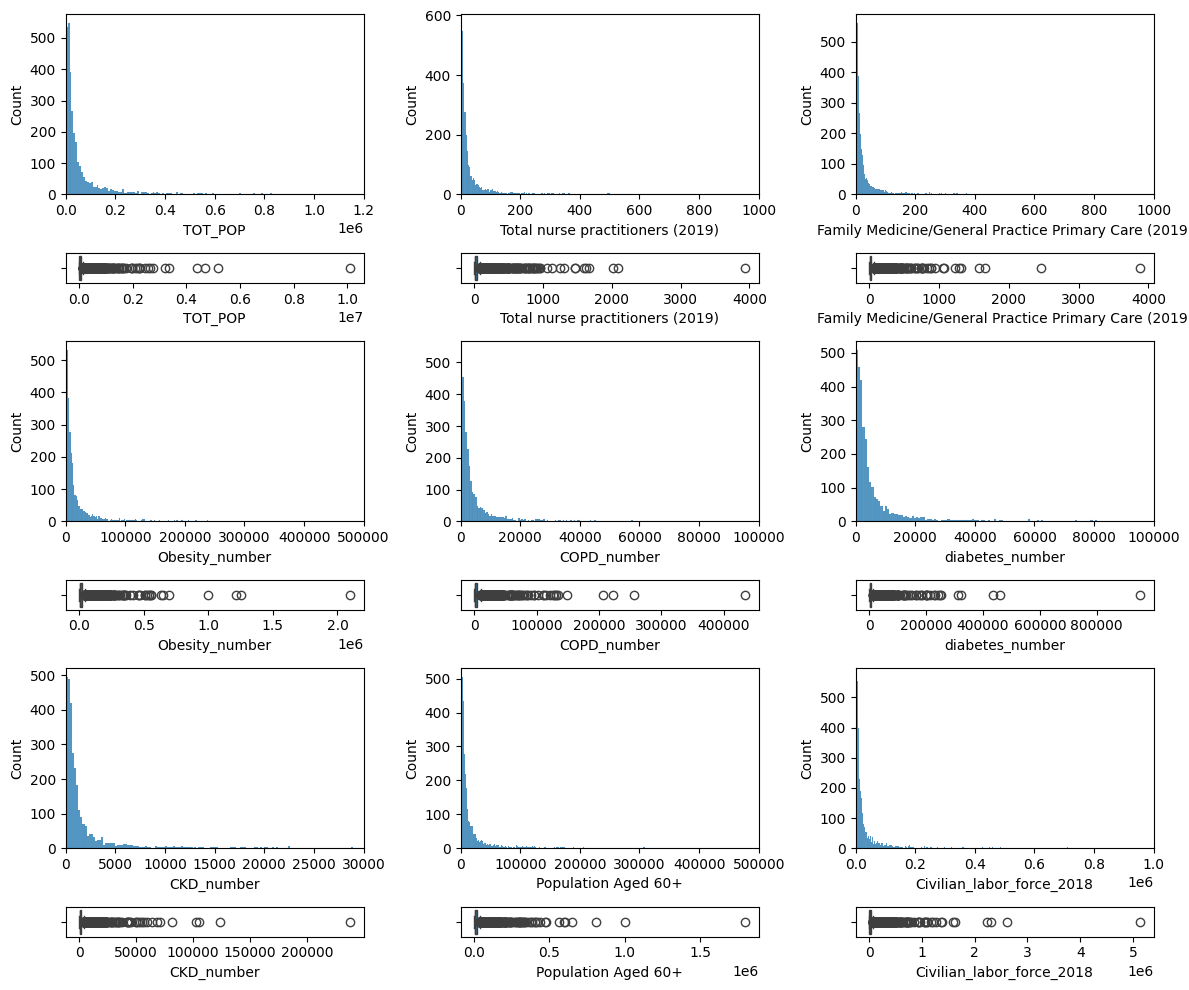

In [231]:
fig, axis = plt.subplots(6, 3, figsize=(12, 10), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0,0], data = df, x = "TOT_POP").set_xlim(0,1200000)
sns.boxplot(ax = axis[1, 0], data = df, x = "TOT_POP")

sns.histplot(ax = axis[0,1], data = df, x = "Total nurse practitioners (2019)").set_xlim(0,1000)
sns.boxplot(ax = axis[1, 1], data = df, x = "Total nurse practitioners (2019)")

sns.histplot(ax = axis[0,2], data = df, x = "Family Medicine/General Practice Primary Care (2019)").set_xlim(0,1000)
sns.boxplot(ax = axis[1, 2], data = df, x = "Family Medicine/General Practice Primary Care (2019)")

sns.histplot(ax = axis[2,0], data = df, x = "Obesity_number").set_xlim(0,500000)
sns.boxplot(ax = axis[3, 0], data = df, x = "Obesity_number")

sns.histplot(ax = axis[2,1], data = df, x = "COPD_number").set_xlim(0,100000)
sns.boxplot(ax = axis[3, 1], data = df, x = "COPD_number")

sns.histplot(ax = axis[2,2], data = df, x = "diabetes_number").set_xlim(0,100000)
sns.boxplot(ax = axis[3, 2], data = df, x = "diabetes_number")

sns.histplot(ax = axis[4,0], data = df, x = "CKD_number").set_xlim(0,30000)
sns.boxplot(ax = axis[5, 0], data = df, x = "CKD_number")

sns.histplot(ax = axis[4,1], data = df, x = "Population Aged 60+").set_xlim(0,500000)
sns.boxplot(ax = axis[5, 1], data = df, x = "Population Aged 60+")

sns.histplot(ax = axis[4,2], data = df, x = "Civilian_labor_force_2018").set_xlim(0,1000000)
sns.boxplot(ax = axis[5, 2], data = df, x = "Civilian_labor_force_2018")

plt.tight_layout()
plt.show()

/tmp/ipykernel_818/4221341527.py:30: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


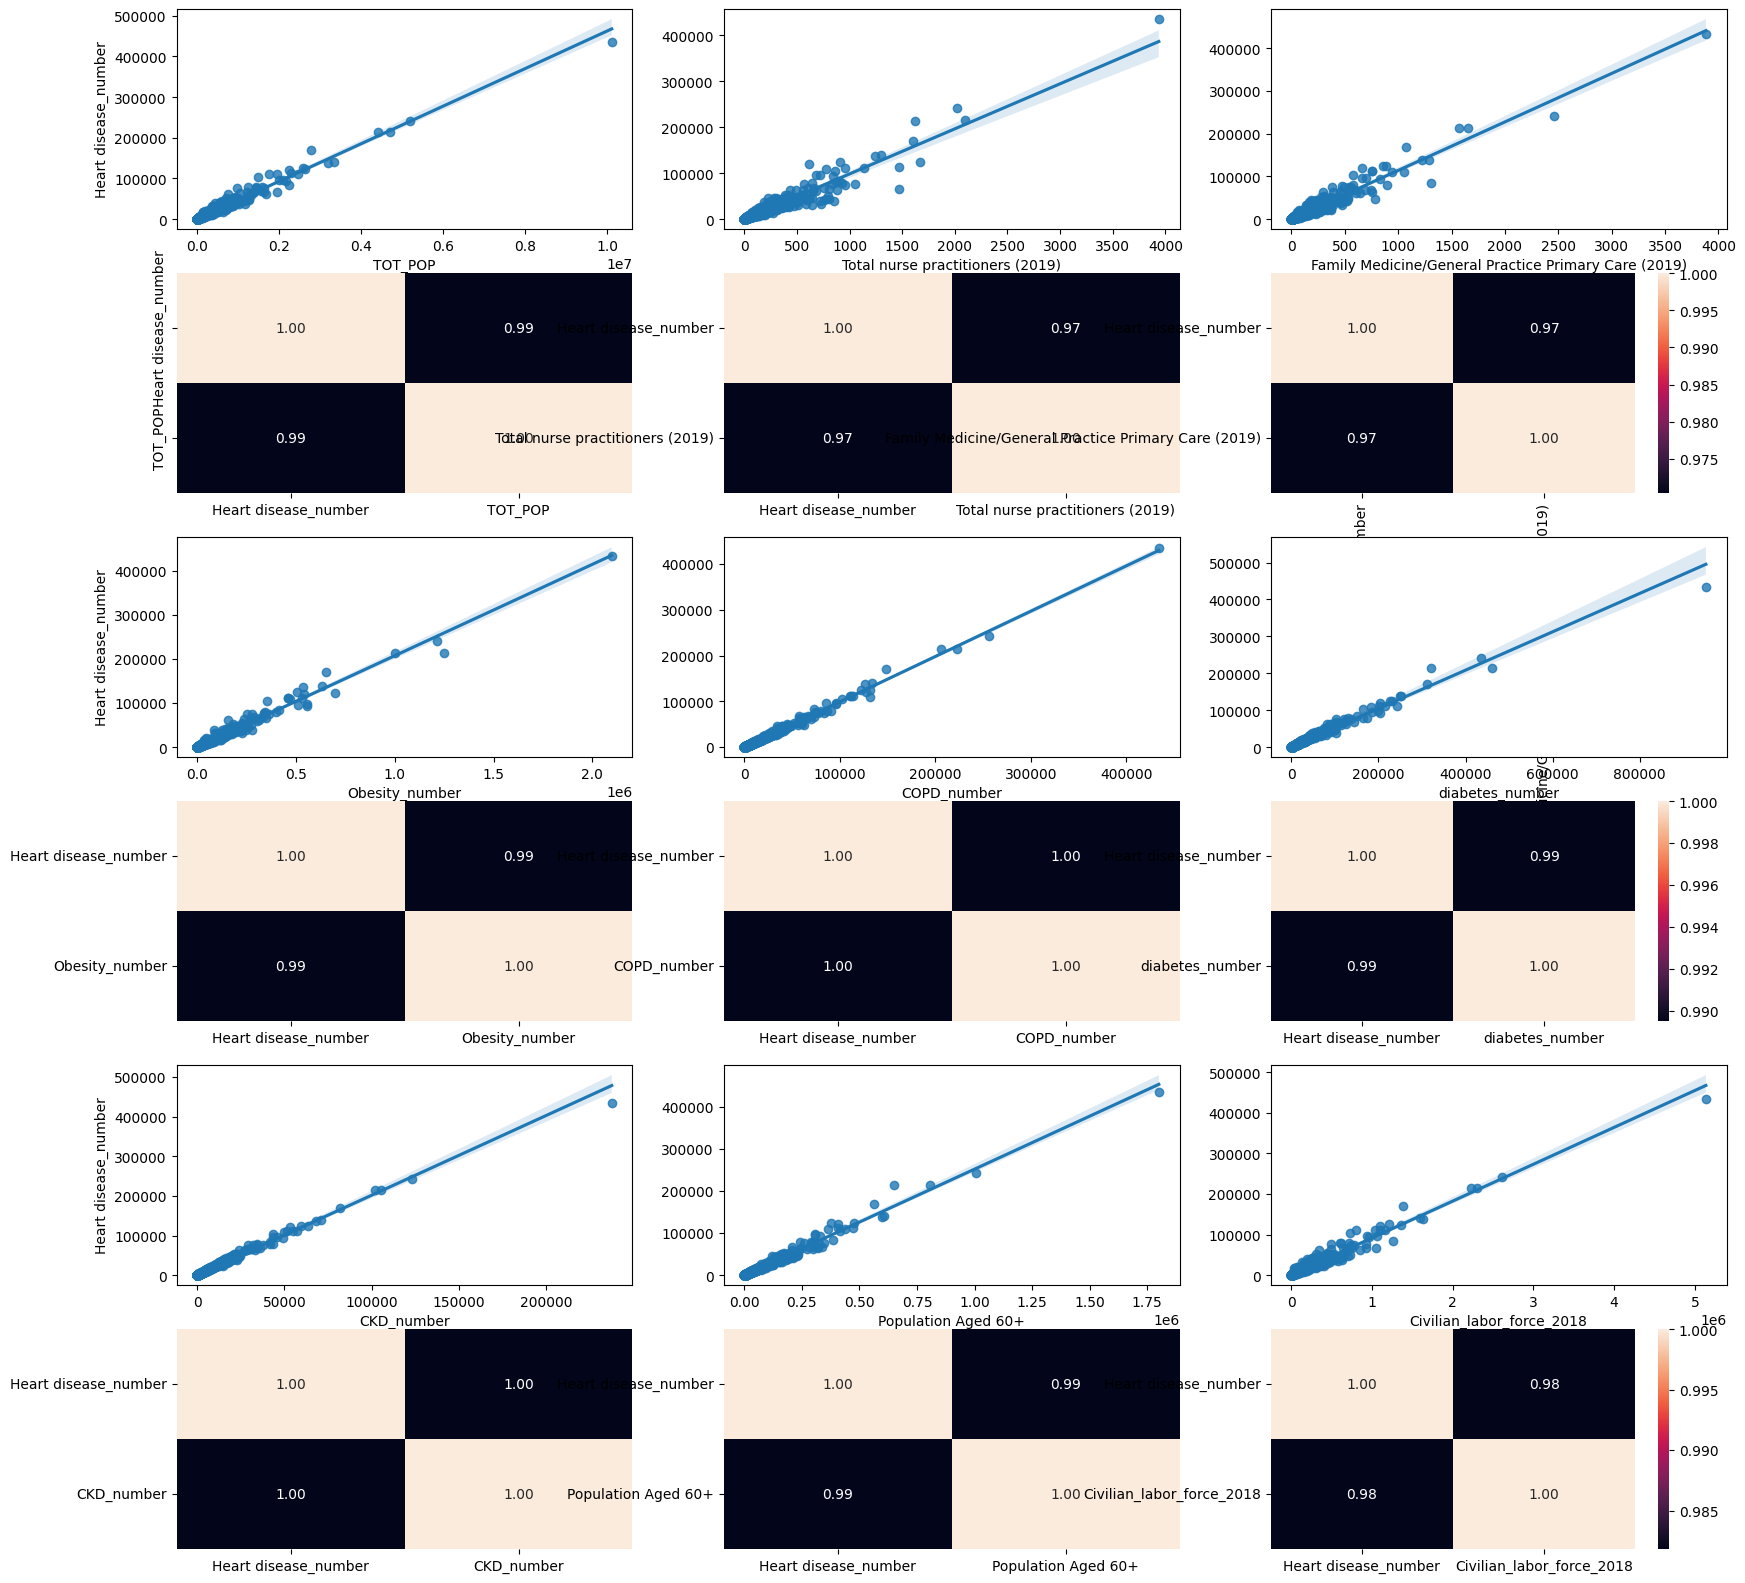

In [232]:
fig, axis = plt.subplots(6, 3, figsize=(20, 20))

sns.regplot(ax = axis[0,0], data = df, x = "TOT_POP", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "TOT_POP"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "Total nurse practitioners (2019)", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Total nurse practitioners (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0,2], data = df, x = "Family Medicine/General Practice Primary Care (2019)", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Family Medicine/General Practice Primary Care (2019)"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

sns.regplot(ax = axis[2,0], data = df, x = "Obesity_number", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "Obesity_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2,1], data = df, x = "COPD_number", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "COPD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(ax = axis[2,2], data = df, x = "diabetes_number", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "diabetes_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])

sns.regplot(ax = axis[4,0], data = df, x = "CKD_number", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "CKD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4,1], data = df, x = "Population Aged 60+", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Population Aged 60+"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

sns.regplot(ax = axis[4,2], data = df, x = "Civilian_labor_force_2018", y = "Heart disease_number").set(ylabel = None)
sns.heatmap(df[["Heart disease_number", "Civilian_labor_force_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 2])

plt.tight_layout()
plt.show()

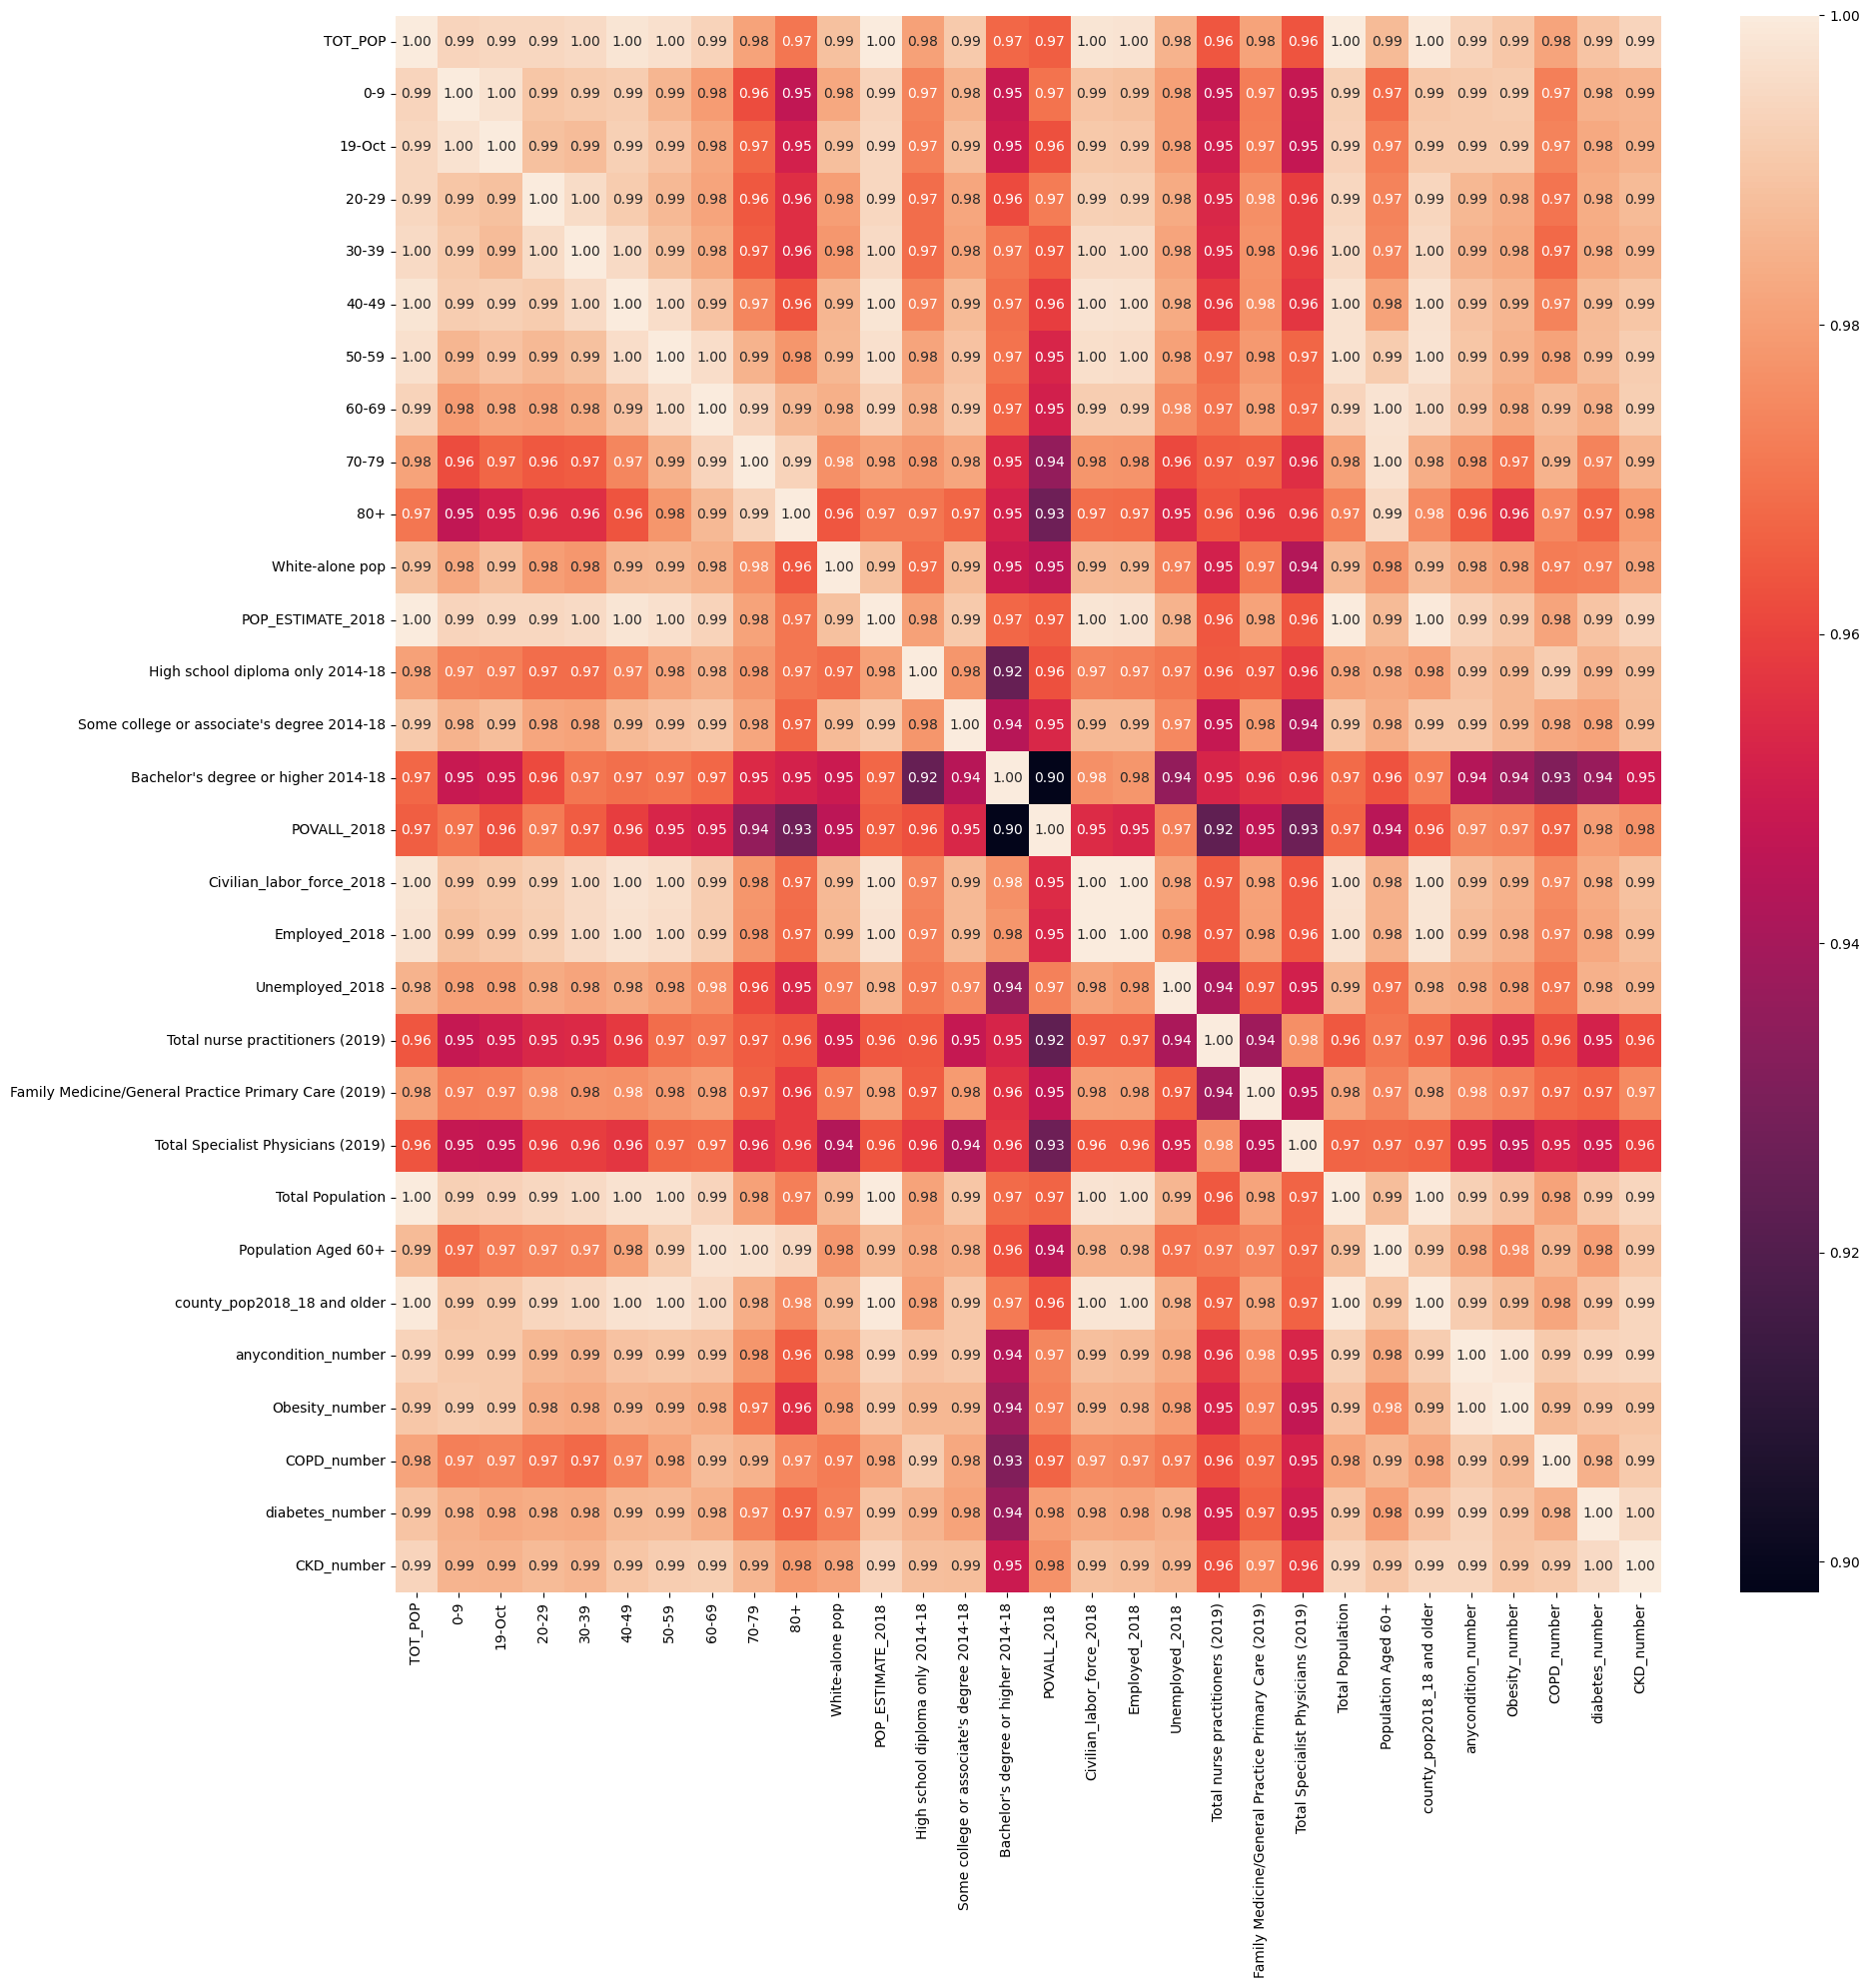

In [233]:
fig, axes = plt.subplots(figsize=(20,20))

sns.heatmap(df[X_train_norm.columns].corr(),annot=True,fmt=".2f")

plt.tight_layout()
plt.show()

In [234]:
df[X_train_norm.columns].describe()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,...,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,...,44.393892,167.332629,1.022266e+05,2.132298e+04,8.081460e+04,3.338540e+04,2.527613e+04,5827.242357,9326.577707,2466.234076
std,3.335834e+05,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,...,133.348667,543.035916,3.283878e+05,6.140588e+04,2.585190e+05,9.888669e+04,7.446684e+04,15720.551934,29754.601185,7730.422067
min,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,...,0.030356,0.111759,7.400000e+01,2.700000e+01,8.800000e+01,4.100000e+01,2.500000e+01,7.000000,11.000000,3.000000
25%,1.096325e+04,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,...,5.312558,14.740077,1.096700e+04,2.814750e+03,8.460250e+03,4.215000e+03,3.075000e+03,815.000000,1187.750000,314.750000
50%,2.580050e+04,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,1160.000000,...,12.153987,36.223582,2.570400e+04,6.310000e+03,2.023000e+04,9.753000e+03,7.182500e+03,1963.500000,2743.000000,718.000000
75%,6.791300e+04,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,2899.750000,...,31.312501,103.869345,6.750075e+04,1.610625e+04,5.282025e+04,2.500125e+04,1.854250e+04,4727.000000,6679.250000,1776.250000
max,1.010552e+07,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,...,3882.586846,15014.048660,1.010572e+07,1.800341e+06,7.916625e+06,2.877316e+06,2.097906e+06,434075.000000,952335.000000,237766.000000


In [235]:
X_train = X_train_norm
X_test = X_test_norm

In [252]:
X_train.columns

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Total nurse practitioners (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')

In [251]:
X_test.columns

Index(['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'White-alone pop', 'POP_ESTIMATE_2018',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Total nurse practitioners (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')

In [242]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [247]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): 53.71602956987772
Coefficients: [-119527.23394079  292434.85038039 -169548.6254883  -198131.48775084
 -332115.98846941  -83360.46461357 -117207.09834487 -222053.88369738
  -48248.21462032  -71180.09882607   59545.05500357 -119527.23394079
   43782.8426469    16292.15574987   56369.44575036   44832.95687683
   20134.98595017   23086.37173934  -40122.5139074   -10353.50896118
  -23757.23506435   -8480.25352678 -489678.79047037  226608.93467102
 1345151.27679803  -36859.93776228   74269.45550531  146265.48098563
   76009.72789242  103448.78510112]


In [248]:
y_pred = model.predict(X_test)
y_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Less than a high school diploma 2014-18
Feature names seen at fit time, yet now missing:
- Bachelor's degree or higher 2014-18


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score